<a href="https://colab.research.google.com/github/dbatu00/python-datasci-projects/blob/main/NBA_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red">IMPORTANT</font>

<font color="red">This is just a template for your project reports. You do not have to use the exact structure here. You may add your own sections/subsections. However, you are required to preserve the same report flow.</font>

# [Project Title - 21]

Group Members:

Ercan Beyen

Berkay Çağrı Soylu

Mehmet Berke Sezgin 

Deniz Batu

Cem Parlar



## Introduction

<font color="blue">
Briefly discuss the background and the rationale of the project.
</font>

In NBA drafts, better or more wanted players are chosen in top picks. We want to identify whether these top picked players are chosen with the expectation of overall efficiency or are they chosen in better draft positions with the expactation of offensive efficiency and better offensive traits. We intend to discover the relation between these stats and formulate what are the required strengths and valuable attributes for players to be the top picks in drafts. In order to solve our project question we first used linear regression model which gave us a weak correlation between the efficiencies and the draft picks, secondly we used random forest classification model which gave us some unexpected results as we expected the ones who has higher draft picks has higher efficiencies but we observed some exceptions for this model. Lastly we used random forest regression which resulted in the optimal accuracy while showing much stronger correlation between the efficiencies and the draft picks. In addition it proved that standart efficiency has a much stronger correlation with the draft picks.


### Problem Definition 

<font color="blue">
State your problem in technical terms. What is your end goal? How are you going to solve it?
</font>

We want to clarify which attributes of NBA players are given priority while they are being selected in Drafts. So in order to answer this question we want to compare the top players offensive and standard efficiencies so that we can understand and visualize whether these players were chosen with the expactation of performing high standard efficiency or high offensive efficiency.

### Utilized Datasets 

<font color="blue">
Describe the utilized datasets in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps reader understand what you are dealing with.
</font>

Our utilized datasets provide the spesific data of players such as, their draft pick position and their draft round and other stats which we will need to calculate their standard and offensive efficiency. Utilized datasets also get rid of any unnecessary data which we will not need in order to answer our question about the NBA drafts. In addition to these we also limit our datasets between the years 2010 and 2013 in order to gain meaningful data and insight while also providing more precise information and visaulisation to help the readers understand the data and interpret it much more effortlessly.



Links of Data Sets:

* https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues

*	https://www.kaggle.com/drgilermo/nba-players-stats

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

# displaying option
pd.set_option('max_rows', 10)

%matplotlib inline

In [ ]:
# Display the dataFrame
file_name = "players_stats_by_season_full_details.csv"

df = pd.read_csv(join(path_prefix, file_name))
df.head()

NameError: ignored

## Raw data is displayed.




In [ ]:
"""
Explanation: Column name which is named 3PM is transformed to 3:00 PM by software system of computer automatically. 
Since 3:00 PM column name is irrelevant, the name of the column is changed as 3_PM for preventing naming problems
"""

def transfer_3PM(row):
  current_data = row["3:00 PM"]
  return current_data

df["3_PM"] = df.apply(transfer_3PM, axis = 1)

df.drop("3:00 PM", axis = 1, inplace = True)
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team,3_PM
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic,0
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors,95
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz,2
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,261,442,620,230,162,71,196,267,328,144,5,1989,1975.0,Jun,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers,89
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,520,311,423,224,178,100,429,529,732,153,18,1982,1968.0,Jul,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics,177


### Column name which is named 3PM is transformed to 3:00 PM by software system of computer automatically. Since 3:00 PM column name is irrelevant, the name of the column is changed as 3_PM for preventing naming problem.

In [ ]:
"""
Explanation: Columns which are related are extracted
"""

def IsValid2011(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2010 - 2011" and stage == "Regular_Season":
    return "valid"
  return None

def IsValid2012(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2011 - 2012" and stage == "Regular_Season":
    return "valid"
  return None  

def IsValid2013(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and season == "2012 - 2013" and stage == "Regular_Season":
    return "valid"
  return None

def IsInTen(row): #Checks if the player is in the draft picks 1 or 2.
  draft_round = row["draft_round"]
  draft_pick = row["draft_pick"]

  if draft_round == 1 and draft_pick <= 2:
    return "inTen"
  
  return None

#df
df_2011 = df.copy()
df_2012 = df.copy()
df_2013 = df.copy()

# 2011
df_2011["valid"] = df_2011.apply(IsValid2011, axis = 1)
df_2011.dropna(inplace = True)

#df # Debuging
df_2011.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2011.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2011["inTen"] = df_2011.apply(IsInTen, axis = 1)
df_2011.dropna(inplace = True)
df_2011.drop("inTen", axis = 1, inplace = True)
#df.head(10)

# 2012
df_2012["valid"] = df_2012.apply(IsValid2012, axis = 1)
df_2012.dropna(inplace = True)

#df # Debuging
df_2012.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2012.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2012["inTen"] = df_2012.apply(IsInTen, axis = 1)
df_2012.dropna(inplace = True)
df_2012.drop("inTen", axis = 1, inplace = True)


# 2013
df_2013["valid"] = df_2013.apply(IsValid2013, axis = 1)
df_2013.dropna(inplace = True)

#df # Debuging
df_2013.drop("valid", axis = 1, inplace = True)
#df # Debuging

# NBA Standard Efficiency: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
# NBA Individual Offensive Efficiency = PGEN / NPT
df_2013.drop(["Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_2013["inTen"] = df_2013.apply(IsInTen, axis = 1)
df_2013.dropna(inplace = True)
df_2013.drop("inTen", axis = 1, inplace = True)

unique_players_array = df.Player.unique()
print("number of unique players:", len(unique_players_array))
#print(unique_players_array)
#print(df_2011.head(10))

df_2011.head(10)

number of unique players: 14582


,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM
11849,NBA,2010 - 2011,Kevin Durant,OKC,78,711,1538,414,594,675,218,57,533,214,88,76,2161,1.0,2.0,Seattle SuperSonics,145
11850,NBA,2010 - 2011,LeBron James,MIA,79,758,1484,279,503,663,284,80,590,554,124,50,2111,1.0,1.0,Cleveland Cavaliers,92
11852,NBA,2010 - 2011,Derrick Rose,CHI,81,711,1597,385,476,555,278,81,330,623,85,51,2026,1.0,1.0,Chicago Bulls,128
11858,NBA,2010 - 2011,Blake Griffin,LAC,82,696,1376,24,446,695,223,270,989,312,63,45,1845,1.0,1.0,Los Angeles Clippers,7
11860,NBA,2010 - 2011,Dwight Howard,ORL,78,619,1044,7,546,916,279,309,1098,107,107,186,1784,1.0,1.0,Orlando Magic,0
11861,NBA,2010 - 2011,LaMarcus Aldridge,POR,81,707,1415,23,351,444,153,278,709,170,82,94,1769,1.0,2.0,Chicago Bulls,4
11874,NBA,2010 - 2011,Michael Beasley,MIN,73,561,1246,164,219,291,195,118,409,158,54,52,1401,1.0,2.0,Miami Heat,60
11889,NBA,2010 - 2011,Elton Brand,PHI,81,502,981,1,213,273,101,237,676,120,92,106,1217,1.0,1.0,Chicago Bulls,0
11919,NBA,2010 - 2011,Tim Duncan,SAS,76,419,838,4,184,257,122,169,678,203,50,146,1022,1.0,1.0,San Antonio Spurs,0
11963,NBA,2010 - 2011,Tyson Chandler,DAL,74,266,407,0,216,295,88,206,692,32,36,80,748,1.0,2.0,Los Angeles Clippers,0


### New data frames are created season by season for 2010-2011, 2011-2012 and 2012-2013. Unnecessary features are extracted from the data frame.

#### For example: The filtered data for 2010-2011 is given to represent the data frames as an example. 

**GP:** Games played, **FGM**: Field Goals Made , **FGA**: Field Goals Attempted , **3PA**: 3 points Attempted , **FTM**: Free Throw Made , **FTA**: Free Throw Attempted , **TOV**: Turnover , **ORB**: Offensive Rebound , **REB**: Rebound , **AST**: Assist , **STL**: Steal , **BLK**: Blocks , **PTS**: Total points made , **draft_round**: The number of round the player is picked , **draft_pick**: The number of order which player is chosen , **3_PM**: 3 points made

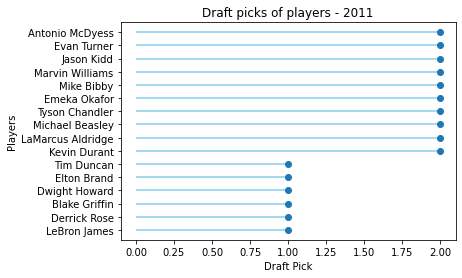

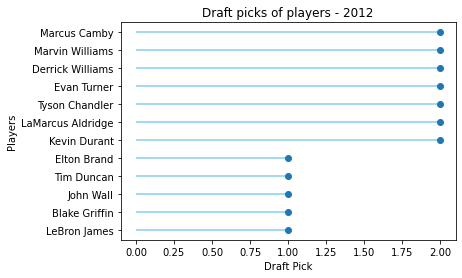

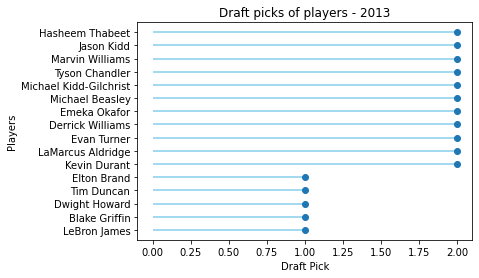

In [ ]:
'''
Visualisation of utilized data.
'''

my_range= range(1,len(df_2011.index)+1)
ordered_df=df_2011.sort_values(by="draft_pick")
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['draft_pick'], color='skyblue')
plt.plot(ordered_df['draft_pick'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Player'])
plt.title("Draft picks of players - 2011")
plt.xlabel('Draft Pick')
plt.ylabel('Players');

plt.show()
#2012
my_range= range(1,len(df_2012.index)+1)
ordered_df=df_2012.sort_values(by="draft_pick")
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['draft_pick'], color='skyblue')
plt.plot(ordered_df['draft_pick'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Player'])
plt.title("Draft picks of players - 2012")
plt.xlabel('Draft Pick')
plt.ylabel('Players');

plt.show()

#2013
my_range= range(1,len(df_2013.index)+1)
ordered_df=df_2013.sort_values(by="draft_pick")
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['draft_pick'], color='skyblue')
plt.plot(ordered_df['draft_pick'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Player'])
plt.title("Draft picks of players - 2013")
plt.xlabel('Draft Pick')
plt.ylabel('Players');

plt.show()

## Visualisation of the players which whose draft round is 1 and draft pick is 1 or 2 for the readers to understand.

## Data Exploration

<font color="blue">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

In this section, we show what is the average standard and offensive efficiency by calculating them with the usage of our data in our utilised data:

***NBA Standard Efficiency Formula***: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TOV) / GP

***Standard efficiency*** is the formula which calculates how beneficial a player for the team is in general terms.

***Offensive Efficiency Formula***: (PTS + AST) / Possession for player.

*Posession for player = FGA - ORB + TOV + (0.4 * FTA)

***Offensive efficiency*** is the formula which calculates how beneficial a player for the team is in offensive terms.

After calculating these values, we visualise them with graphs and show each variables difference for every player.

To indicate the importance of these stats we select the top picked players who appear in all the seasons between 2010-2013 and display their average standard and offensive efficiency throughout these seasons.


In [ ]:
"""
Calculating NBA Standard Efficiency Formula and Offensive Efficiency Formula and displaying for 2011
"""

#NBA Standard Efficiency Formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP
#Offensive Efficiency Formula: True Shooting Percentage, Effective Field goal percantage, Offensive rebound percantage
#True Shooting Percentage = PTS/(2(FGA+(0.44*FTA))
#Effective Field goal percantage: (FGM + 0.5 * 3PM) / FGA
#Offensive rebound percantage: (ORB / REB) * 100


# st_eff: standard efficiency
# League	Season	Player	Team	GP	FGM	FGA	3PA	FTM	FTA	TOV	ORB	REB	AST	STL	BLK	PTS	draft_round	draft_pick	draft_team



def findStandardEfficiency(row): #Calculating the standard efficiency of the players for each player
  point = row["PTS"]
  rebound = row["REB"]
  assist = row["AST"]
  steal = row["STL"]
  block = row["BLK"]
  missed_fg = row["FGA"] - row["FGM"]
  missed_ft = row["FTA"] - row["FTM"]
  turnover = row["TOV"]
  game_played = row["GP"]

  standard_efficiency = (point + rebound + assist + steal + block - missed_fg - missed_ft - turnover) / game_played
  return standard_efficiency

def findOffensiveEfficiency(row): #Calculating the offensive efficiency of the players for each player
  field_goal_attempt = row["FGA"]
  free_throw_attempt = row["FTA"]
  point = row["PTS"]
  assist = row["AST"]
  offensive_rebound = row["ORB"]
  turnover = row["TOV"]

  true_shooting_percentage = point / (2 * (field_goal_attempt + (0.44 * free_throw_attempt)))
    


  possession_for_player = field_goal_attempt - offensive_rebound + turnover + (0.4 * free_throw_attempt)
  offensive_efficiency = (point + assist) / possession_for_player
  offensive_data = offensive_efficiency * 15 # to get meaningful_data
  return offensive_data

"""
Calculating NBA Standard Efficiency Formula and Offensive Efficiency Formula and displaying for 2012
"""

df_2011["st_eff"] = df_2011.apply(findStandardEfficiency, axis = 1)
df_2011.head(3)

df_2011["off_eff"] = df_2011.apply(findOffensiveEfficiency, axis = 1)
display(df_2011.head(3))

"""
Calculating NBA Standard Efficiency Formula and Offensive Efficiency Formula and displaying for 2012
"""

#st_eff and off_eff columns added to year 2012
df_2012["st_eff"] = df_2012.apply(findStandardEfficiency, axis = 1)
df_2012.head(3)

df_2012["off_eff"] = df_2012.apply(findOffensiveEfficiency, axis = 1)
display(df_2012.head(3))

"""
Calculating NBA Standard Efficiency Formula and Offensive Efficiency Formula and displaying for 2013
"""

#st_eff and off_eff columns added to year 2013
df_2013["st_eff"] = df_2013.apply(findStandardEfficiency, axis = 1)
(df_2013.head(3))

df_2013["off_eff"] = df_2013.apply(findOffensiveEfficiency, axis = 1)
display(df_2013.head(3))

,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
11849,NBA,2010 - 2011,Kevin Durant,OKC,78,711,1538,414,594,675,218,57,533,214,88,76,2161,1.0,2.0,Seattle SuperSonics,145,24.948718,18.092941
11850,NBA,2010 - 2011,LeBron James,MIA,79,758,1484,279,503,663,284,80,590,554,124,50,2111,1.0,1.0,Cleveland Cavaliers,92,28.594937,20.466414
11852,NBA,2010 - 2011,Derrick Rose,CHI,81,711,1597,385,476,555,278,81,330,623,85,51,2026,1.0,1.0,Chicago Bulls,128,23.111111,19.709821


,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
14704,NBA,2011 - 2012,Kevin Durant,OKC,66,643,1297,344,431,501,248,40,527,231,88,77,1850,1.0,2.0,Seattle SuperSonics,133,27.287879,18.303624
14705,NBA,2011 - 2012,LeBron James,MIA,62,621,1169,149,387,502,213,94,492,387,115,50,1683,1.0,1.0,Cleveland Cavaliers,54,29.854839,20.855723
14709,NBA,2011 - 2012,Blake Griffin,LAC,66,561,1022,16,244,468,150,218,717,210,54,48,1368,1.0,1.0,Los Angeles Clippers,2,23.666667,20.741325


,League,Season,Player,Team,GP,FGM,FGA,3PA,FTM,FTA,TOV,ORB,REB,AST,STL,BLK,PTS,draft_round,draft_pick,draft_team,3_PM,st_eff,off_eff
18717,NBA,2012 - 2013,Kevin Durant,OKC,81,731,1433,334,679,750,280,46,640,374,116,105,2280,1.0,2.0,Seattle SuperSonics,139,30.395062,20.238943
18719,NBA,2012 - 2013,LeBron James,MIA,76,765,1354,254,403,535,226,97,610,551,129,67,2036,1.0,1.0,Cleveland Cavaliers,103,32.184211,22.866824
18726,NBA,2012 - 2013,LaMarcus Aldridge,POR,74,638,1318,14,282,348,143,175,670,192,62,91,1560,1.0,2.0,Chicago Bulls,2,22.783784,18.439517


###Standard Efficiency and Offensive Efficiency features are added to the data frame for each year and they are shown.

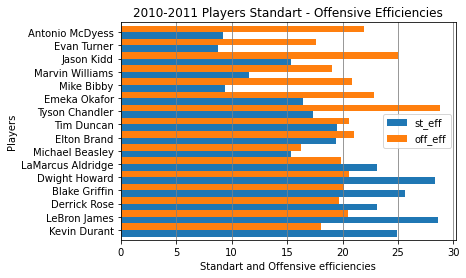

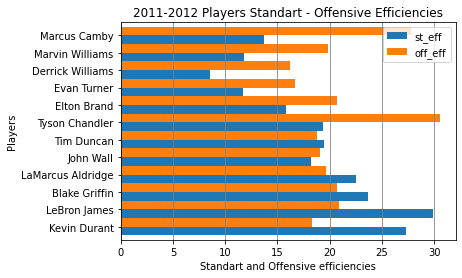

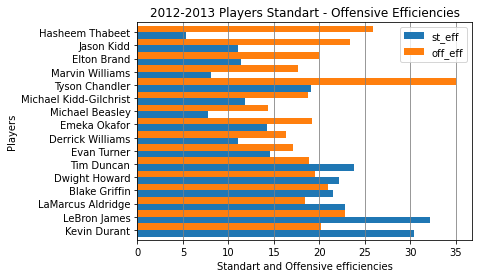

In [ ]:
"""
Bar Charts are created for each season with using filtered dataFrame
"""

# Barh Chart Graph for 2010 - 2011

stf_2011_arr = df_2011.iloc[:, 1:]["st_eff"].values
off_2011_arr = df_2011.iloc[:, 1:]["off_eff"].values
player_2011_arr = df_2011.iloc[:, 1:]["Player"].values
st_of_2011_df = pd.DataFrame({"st_eff": stf_2011_arr,
                              "off_eff": off_2011_arr}, index = player_2011_arr)

chart_2011 = st_of_2011_df.plot.barh( width=1, title ="2010-2011 Players Standart - Offensive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2011.set_xlabel("Standart and Offensive efficiencies")
chart_2011.set_ylabel("Players")


# Barh Chart Graph for 2011 - 2012

stf_2012_arr = df_2012.iloc[:, 1:]["st_eff"].values
off_2012_arr = df_2012.iloc[:, 1:]["off_eff"].values
player_2012_arr = df_2012.iloc[:, 1:]["Player"].values
st_of_2012_df = pd.DataFrame({"st_eff": stf_2012_arr,
                              "off_eff": off_2012_arr}, index = player_2012_arr)

chart_2012 = st_of_2012_df.plot.barh( width=1, title ="2011-2012 Players Standart - Offensive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2012.set_xlabel("Standart and Offensive efficiencies")
chart_2012.set_ylabel("Players")


# Barh Chart Graph for 2012 - 2013

stf_2013_arr = df_2013.iloc[:, 1:]["st_eff"].values
off_2013_arr = df_2013.iloc[:, 1:]["off_eff"].values
player_2013_arr = df_2013.iloc[:, 1:]["Player"].values
st_of_2013_df = pd.DataFrame({"st_eff": stf_2013_arr,
                              "off_eff": off_2013_arr}, index = player_2013_arr)

chart_2013 = st_of_2013_df.plot.barh( width=1, title ="2012-2013 Players Standart - Offensive Efficiencies")
plt.grid(axis="x",color="gray")
chart_2013.set_xlabel("Standart and Offensive efficiencies")
chart_2013.set_ylabel("Players"); # ; added for removing meaningless writting at the top

##Season by season the offensive and standart efficiencies are shown to compare a players' efficiencies.

###We can see that offensive efficiency is higher then the standart efficiency stat for most of the players in 2012-2013, year by year players focused more on their offensive traits rather than their defensive traits which results in increasing of offensive efficiency.


In [ ]:
"""
5 players are selected in order to evaluation
"""
stf_2011_arr = df_2011.iloc[:, 1:]["st_eff"].values
off_2011_arr = df_2011.iloc[:, 1:]["off_eff"].values
player_2011_arr = df_2011.iloc[:, 1:]["Player"].values

# 2011
tuple_2011 = list(zip(player_2011_arr, stf_2011_arr, off_2011_arr))
"""
for player, stf, off in tuple_2011:
  print(player, stf, off)
"""
# 2012
tuple_2012 = list(zip(player_2012_arr, stf_2012_arr, off_2012_arr))

#2013
tuple_2013 = list(zip(player_2013_arr, stf_2013_arr, off_2013_arr))  



def findWantedPlayers(tuple_list, number_of_players):
  current_tuple_list = []
  tuple_list = list(tuple_list)
  for i in range(number_of_players):
      player = tuple_list[i][0]
      if player == "LeBron James" or player == "Kevin Durant" or player == "Blake Griffin" or player == "Tim Duncan" or player == "Elton Brand":
        #current_tuple_list.remove(tuple_list[i])
        current_tuple_list.append(tuple_list[i])

  return current_tuple_list

new_list_2011 = findWantedPlayers(tuple_2011, len(player_2011_arr))
new_tuple_2011 = list(tuple(new_list_2011))
new_list_2012 = findWantedPlayers(tuple_2012, len(player_2012_arr))
new_tuple_2012 = list(tuple(new_list_2012))
new_list_2013 = findWantedPlayers(tuple_2013, len(player_2013_arr))
new_tuple_2013 = list(tuple(new_list_2013))

print(new_tuple_2011)
print()
print(new_tuple_2012)
print()
print(new_tuple_2013)

[('Kevin Durant', 24.94871794871795, 18.0929405789741), ('LeBron James', 28.59493670886076, 20.466414089698954), ('Blake Griffin', 25.634146341463413, 20.133789670192908), ('Elton Brand', 19.395061728395063, 21.017606371829803), ('Tim Duncan', 19.539473684210527, 20.558290445289778)]

[('Kevin Durant', 27.28787878787879, 18.303623783276652), ('LeBron James', 29.85483870967742, 20.855722729715207), ('Blake Griffin', 23.666666666666668, 20.741324921135643), ('Tim Duncan', 19.448275862068964, 18.79575402635432), ('Elton Brand', 15.833333333333334, 20.71611253196931)]

[('Kevin Durant', 30.395061728395063, 20.238942552109812), ('LeBron James', 32.18421052631579, 22.86682380671774), ('Blake Griffin', 21.5375, 21.01256645722571), ('Tim Duncan', 23.797101449275363, 18.9142091152815), ('Elton Brand', 11.416666666666666, 19.94572591587517)]


##We have selected 5 different players which exist in all three seasons and dropped the stats of them which we are not gonna use and converted to 3 different lists season by season.

In [ ]:
"""
Get standard efficiency average and offensive efficiency average for selected 5 players
"""

def get_top_5_list(position):
  #if position == 1:
  #player_index = 1
  wanted_stats_list = []
  #while player_index < 3:

  for feature_index in range(5): # iterate through each player
    wanted_stats_list.append((new_tuple_2011[feature_index][position] + new_tuple_2012[feature_index][position] + new_tuple_2013[feature_index][position]) / 3)
 
  return wanted_stats_list 

st_index = 1 # store index of standard efficeny
off_index = 2  # store index of offensive efficency
st_eff_list = get_top_5_list(1)
off_eff_list = get_top_5_list(2)

#print(final_players_list)
print(st_eff_list)
print()
print(off_eff_list)

[27.543886154997267, 30.21132864828466, 23.61277100271003, 20.880146346579796, 15.596491228070176]

[18.878502304786856, 21.396320208710634, 20.629227016184753, 19.57585650448854, 20.40670963104475]


##We calculated the average stats of 3 years for standart efficiency and offensive efficiency stats for the selected 5 players.

In [ ]:
"""
Displaying the standard efficiency average and offensive efficiency average for selected 5 players
"""


selected_5_players_df = pd.DataFrame(st_eff_list, columns = ["avg_st_eff"])

selected_5_players_df.head(5)

selected_5_player_list = ["LeBron James", "Kevin Durant", "Blake Griffin", "Tim Duncan", "Elton Brand"]
selected_5_players_df = pd.DataFrame({"avg_st_eff": st_eff_list,
                              "avg_off_eff": off_eff_list}, index = selected_5_player_list)
selected_5_players_df.head(5)


,avg_st_eff,avg_off_eff
LeBron James,27.543886,18.878502
Kevin Durant,30.211329,21.396320
Blake Griffin,23.612771,20.629227
Tim Duncan,20.880146,19.575857
Elton Brand,15.596491,20.406710


##Added the average stats to a new dataframe for selected 5 players and displayed it.

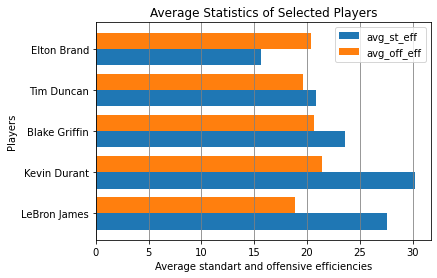

In [ ]:
"""
Displaying the graph of the selected 5 players based on standard efficiency average and offensive efficiency average
"""

avg_chart = selected_5_players_df.plot.barh(width=0.8, title ="Average Statistics of Selected Players")
plt.grid(axis="x",color="gray")
avg_chart.set_xlabel("Average standart and offensive efficiencies")
avg_chart.set_ylabel("Players");

##Created a chart for the new dataset with selected five players we choose them for their existence of all three seasons and the average stats of them.

###We can see that generrally the players which exists in all seasons focused on their defensive traits as likely as their offensive traits. 

## Machine Learning Models

<font color="blue">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

##Linear Regression


### Implementation

<font color="blue">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>

Linear regression

In [ ]:
def IsInPlace(row): #Checks if the player is in the draft round 1.
  draft_round = row["draft_round"]
  draft_pick = row["draft_pick"]

  if draft_round == 1:
    return "inPlace"
  
  return None

def IsValidML(row): # extracts related rows
  season = row["Season"]
  league = row["League"]
  stage = row["Stage"]

  #if (league == "NBA") and ((season == "2010 - 2011") or (season == "2011 - 2012") or (season == "2012 - 2013")):
  if league == "NBA" and stage == "Regular_Season":
    if season == "2010 - 2011":
      return "valid"
    elif season == "2011 - 2012":
      return "valid"
    elif season == "2012 - 2013":
      return "valid"

  return None


df_ML = df.copy()
df_ML["valid"] = df_ML.apply(IsValidML, axis = 1)
df_ML.dropna(inplace = True)
df_ML.Player.unique()


df_ML["st_eff"] = df_ML.apply(findStandardEfficiency, axis = 1)
df_ML.head(3)

df_ML["off_eff"] = df_ML.apply(findOffensiveEfficiency, axis = 1)
df_ML.head(3)


df_ML.drop(["League", "Season", "Team", "GP","FGM", "FGA", "3PA", "FTM", "FTA", "TOV", "ORB", "REB", "AST", "STL", "BLK", "PTS", "draft_round", "draft_team", "3_PM", "valid", "Stage", "MIN",	"PF",	"DRB",	"birth_year",	"birth_month",	"birth_date",	"height",	"height_cm",	"weight",	"weight_kg",	"nationality", "high_school"], axis = 1, inplace = True)

df_ML

,Player,draft_pick,st_eff,off_eff
11849,Kevin Durant,2.0,24.948718,18.092941
11850,LeBron James,1.0,28.594937,20.466414
11851,Kobe Bryant,13.0,21.390244,18.201949
11852,Derrick Rose,1.0,23.111111,19.709821
11853,Amar'e Stoudemire,9.0,24.589744,18.386169
...,...,...,...,...
18935,Festus Ezeli,30.0,5.474359,25.891410
18936,Nazr Mohammed,29.0,4.587302,19.225634
18937,Hasheem Thabeet,2.0,5.333333,25.856855
18938,Sam Young,6.0,3.571429,17.160279


### The data frame which will be used in linear regression is created which includes features standart efficiency, offensive efficiency and the draft pick of players.

Coefficients: 
 [10.68873967]


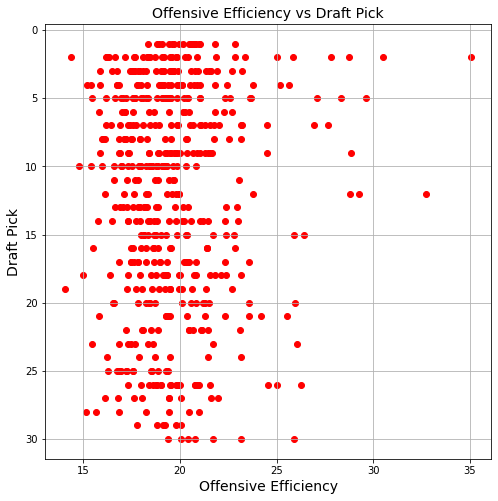

In [ ]:
import sklearn
from sklearn import linear_model

"""
Offensive Efificiency
"""

Y = df_ML['draft_pick']
X = df_ML['off_eff']

regr = linear_model.LinearRegression()
X = X.values.reshape(-1, 1)
regr.fit(X, Y)


print('Coefficients: \n', -100 * regr.coef_)

plt.figure(figsize=(8, 8))
plt.scatter(df_ML['off_eff'], df_ML['draft_pick'], color='red')


plt.title('Offensive Efficiency vs Draft Pick', fontsize=14)
plt.xlabel('Offensive Efficiency', fontsize=14)
plt.ylabel('Draft Pick', fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis() #Ordering the draft pick in the desired formation
plt.show()


### The weak correlation between the players' offensive efficiency and draft pick is displayed on the graph. The correlation between offensive efficiency and draft pick is so much weaker compared to the standard efficiency and draft pick. We observe that the offensive efficiency of a player has so little effect on the player's draft pick.

Coefficients: 
 [35.48085691]


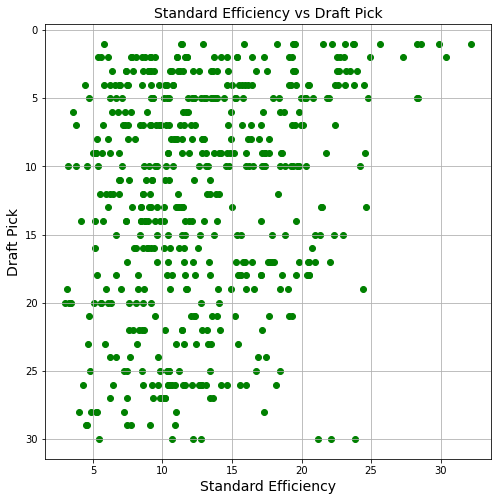

In [ ]:
"""
Standard Efficiency
"""


Y = df_ML['draft_pick']
X = df_ML['st_eff']

regr = linear_model.LinearRegression()
X = X.values.reshape(-1, 1)
regr.fit(X, Y)


print('Coefficients: \n', -100 * regr.coef_)

plt.figure(figsize=(8, 8))
plt.scatter(df_ML['st_eff'], df_ML['draft_pick'], color='green')

plt.title('Standard Efficiency vs Draft Pick', fontsize=14)
plt.xlabel('Standard Efficiency', fontsize=14)
plt.ylabel('Draft Pick', fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis() #Ordering the draft pick in the desired formation

plt.show()

### The strong correlation between players' standard efficiency and draft pick number is seen as it is displayed on the graph. We understand as the standard efficiency of the players increase, the likelihood of them being in the first picks in the draft picks also increases.

### Random Forest


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
def findDraftValue_3Groups(row):
  draft_pick = row["draft_pick"]
  if draft_pick >= 1 and draft_pick <= 10:
    draft_value = 120
  elif draft_pick >= 11 and draft_pick <= 20:
    draft_value = 100
  elif draft_pick >= 21 and draft_pick <= 30:
    draft_value = 80
  else:
    print("Something Wrong!")
    draft_value = 0
  return draft_value

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#stf, off, draft

#df_ML["draft_value"] = df_ML.apply(findDraftValue, axis = 1)

#draft_pick 1 -- 30
#off_eff  100 ---  10

df_off_3_groups = df_ML.copy()
df_off_3_groups["draft_value"] = df_off_3_groups.apply(findDraftValue_3Groups, axis = 1)

df_off_3_groups.drop("Player", axis = 1, inplace = True)
df_off_3_groups.drop("st_eff", axis = 1, inplace = True)


draft_datas = df_off_3_groups["draft_value"] # target data
offensive_datas = df_off_3_groups["off_eff"] # other data

offensive_datas = offensive_datas.values.reshape(-1, 1)

# 80% for training and 20% for testing-validation
offensive_train, offensive_remaining, draft_train, draft_remaining = train_test_split(offensive_datas, draft_datas, test_size = 0.2, random_state = 42)
# 10% validation, 10% test
offensive_test, offensive_validation, draft_test, draft_validation = train_test_split(offensive_remaining, draft_remaining, test_size = 0.5, random_state = 42) # 60


rf_ML = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42)
rf_ML.fit(offensive_train, draft_train)

validation_predict = rf_ML.predict(offensive_validation)
off_rf_3_groups_validation_acc = accuracy_score(draft_validation, validation_predict)
#off_rf_validation_acc = 1 - off_rf_validation_acc
#print(off_rf_ML.fit(offensive_train, draft_train)) # Debuging
print()
print("Offensive - Random Forest Classification Validation Accuracy:y:" + str(off_rf_3_groups_validation_acc)) # Debuging
#print("Percent: " +str(off_rf_3_groups_validation_acc * 100))
df_off_3_groups.head()


Offensive - Random Forest Classification Validation Accuracy:y:0.41509433962264153


,draft_pick,off_eff,draft_value
11849,2.0,18.092941,120
11850,1.0,20.466414,120
11851,13.0,18.201949,100
11852,1.0,19.709821,120
11853,9.0,18.386169,120


Firstly, we created proprtional relation between offensive efficiency and draft pick with using draft value values (offensive efficency - draft value). Then we used Random Forest Classifier in order to estimate statistics. We saw that machine's accuracy in the validation step is 0.41%.

In [ ]:
# Offensive Part
preds_test = rf_ML.predict(offensive_test)
accuracy_test = accuracy_score(draft_test, preds_test)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Offensive - Random Forest Classification Test Accuracy:", accuracy_test)

Offensive - Random Forest Classification Test Accuracy: 0.4528301886792453


We tested the machine and we sae that the accuracy of the machine is 45%. In this case, we may say that the predictabilty of the machine increases 4%.

In [ ]:
# Offensive Part 
print(classification_report(draft_test, preds_test))

              precision    recall  f1-score   support

          80       0.11      0.12      0.12         8
         100       0.40      0.40      0.40        15
         120       0.59      0.57      0.58        30

    accuracy                           0.45        53
   macro avg       0.37      0.36      0.36        53
weighted avg       0.46      0.45      0.46        53



Precision — What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Precision:- Accuracy of positive predictions.

precision:  TP/predicted yes
recall: TP/actual yes

Recall: When it's actually positive, how often does it predict positive?

Precision: When it predicts positive, how often is it correct?

F1-score: What percent of positive predictions were correct? 

For draft value 80, we saw that
    * Precision: it found correct 11% of actual 80 values
    * Recall: it predicts 12% positive among 80 values
    * f1-score: %12 of positive predictions (which were %12) were correct


For draft value 100, we saw that
    * Precision: it found correct 40% of actual 100 values
    * Recall: it predicts 40% positive among 100 values
    * f1-score: %40 of positive predictions (which were %40) were correct

    
For draft value 120, we saw that
    * Precision: it found correct 59% of actual 120 values
    * Recall: it predicts 57% positive among 120 values
    * f1-score: %58 of positive predictions (which were %57) were correct


In [ ]:
# Offensive Part
from sklearn.model_selection import GridSearchCV
from pprint import pprint

n_estimators = [100, 200, 300]
min_samples_split = [3, 5, 6, 10, 15]

grid_parameter = {"n_estimators": n_estimators,
               "min_samples_split": min_samples_split}

#pprint(grid_search) # Debuging
CV_rfc = GridSearchCV(estimator = rf_ML, param_grid = grid_parameter)
CV_rfc.fit(offensive_train, draft_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,

In [ ]:
# Offensive Part
# Displaying best hyperparameters
CV_rfc.best_params_

{'min_samples_split': 15, 'n_estimators': 300}

In [ ]:
# Offensive Part
# Accuracy score with new hyperparameters
grid_preds_validation = CV_rfc.predict(offensive_validation)
CV_rfc_accuracy_validation = accuracy_score(draft_validation, grid_preds_validation)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Offensive Grid Searched Random Forest Classification Validation Accuracy:", CV_rfc_accuracy_validation)

Offensive Grid Searched Random Forest Classification Validation Accuracy: 0.41509433962264153


In [ ]:
# Offensive Part
grid_preds_test = CV_rfc.predict(offensive_test)
CV_rfc_accuracy_test = accuracy_score(draft_test, grid_preds_test)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Offensive Grid Searched Random Forest Classification Test Accuracy:", CV_rfc_accuracy_test)

Offensive Grid Searched Random Forest Classification Test Accuracy: 0.4716981132075472


In [ ]:
# Classification Report- Offensive Part Grid Search
print(classification_report(draft_test, grid_preds_test))

              precision    recall  f1-score   support

          80       0.33      0.12      0.18         8
         100       0.23      0.20      0.21        15
         120       0.57      0.70      0.63        30

    accuracy                           0.47        53
   macro avg       0.38      0.34      0.34        53
weighted avg       0.44      0.47      0.44        53



In [ ]:
# Standard Part
df_stf_3_groups = df_ML.copy()

df_stf_3_groups["draft_value"] = df_stf_3_groups.apply(findDraftValue_3Groups, axis = 1)

df_stf_3_groups.drop("Player", axis = 1, inplace=True)
df_stf_3_groups.drop("off_eff", axis = 1, inplace=True)


draft_datas = df_stf_3_groups['draft_value'] # y
standard_datas = df_stf_3_groups['st_eff'] # x

standard_datas = standard_datas.values.reshape(-1, 1)

# 80% for training and 20% for testing-validation
standard_train, standard_remaining, draft_train, draft_remaining = train_test_split(standard_datas, draft_datas, test_size = 0.2, random_state = 60)
# 10% validation, 10% test
standard_test, standard_validation, draft_test, draft_validation = train_test_split(standard_remaining, draft_remaining, test_size = 0.5, random_state = 60)


rf_ML = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 60)

rf_ML.fit(standard_train, draft_train)

validation_predict = rf_ML.predict(standard_validation)
stf_rf_3_groups_validation_acc = accuracy_score(draft_validation, validation_predict)
#rf_validation_acc = 1- rf_validation_acc
#print(rf_ML.fit(standard_train, draft_train)) # Debuging
print()
print("Standard - Random Forest Classification Validation Accuracy::" + str(stf_rf_3_groups_validation_acc)) # Debuging
#print("Percent: "+str(stf_rf_3_groups_validation_acc *100))
df_stf_3_groups.head(10)


Standard - Random Forest Classification Validation Accuracy::0.39622641509433965


,draft_pick,st_eff,draft_value
11849,2.0,24.948718,120
11850,1.0,28.594937,120
11851,13.0,21.390244,100
11852,1.0,23.111111,120
11853,9.0,24.589744,120
11854,3.0,22.662338,120
11855,5.0,24.763158,120
11856,10.0,20.287500,120
11857,26.0,18.175000,80
11858,1.0,25.634146,120


In [ ]:
# Standard Part
preds_test = rf_ML.predict(standard_test)
accuracy_test = accuracy_score(draft_test, preds_test)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Standard - Random Forest Classification Test Accuracy:", accuracy_test)

Standard - Random Forest Classification Test Accuracy: 0.3584905660377358


In [ ]:
# Classification Report - Standard Part
print(classification_report(draft_test, preds_test))

              precision    recall  f1-score   support

          80       0.00      0.00      0.00        10
         100       0.38      0.33      0.35        18
         120       0.45      0.52      0.48        25

    accuracy                           0.36        53
   macro avg       0.27      0.28      0.28        53
weighted avg       0.34      0.36      0.35        53



In [ ]:
# Standard Part
n_estimators = [100, 200, 300]
min_samples_split = [3, 5, 6, 10, 15]

grid_parameter = {"n_estimators": n_estimators,
               "min_samples_split": min_samples_split}

#pprint(grid_search) # Debuging
CV_rfc = GridSearchCV(estimator = rf_ML, param_grid = grid_parameter)
CV_rfc.fit(standard_train, draft_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,

In [ ]:
# Standard Part
# Displaying best hyperparameters
CV_rfc.best_params_

{'min_samples_split': 15, 'n_estimators': 200}

In [ ]:
# Standard Part
# Accuracy score with new hyperparameters
grid_preds_validation = CV_rfc.predict(standard_validation)
CV_rfc_accuracy_validation = accuracy_score(draft_validation, grid_preds_validation)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Standard - Grid Searched Random Forest Classification Validation Accuracy:", CV_rfc_accuracy_validation)

Standard - Grid Searched Random Forest Classification Validation Accuracy: 0.3018867924528302


In [ ]:
# Standard Part
grid_preds_test = CV_rfc.predict(standard_test)
CV_rfc_accuracy_test = accuracy_score(draft_test, grid_preds_test)
#print("Random Forest Train Accuracy:", rf_accuracy)
print("Standard - Grid Searched Random Forest Classification Test Accuracy:", CV_rfc_accuracy_test)

Standard - Grid Searched Random Forest Classification Test Accuracy: 0.41509433962264153


In [ ]:
# Classification Report - Standard Part Grid Search
print(classification_report(draft_test, grid_preds_test))

              precision    recall  f1-score   support

          80       0.00      0.00      0.00        10
         100       0.50      0.33      0.40        18
         120       0.44      0.64      0.52        25

    accuracy                           0.42        53
   macro avg       0.31      0.32      0.31        53
weighted avg       0.38      0.42      0.38        53



For Offensive Efficiency: 


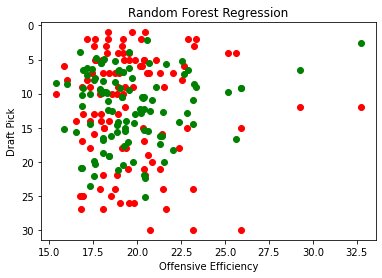

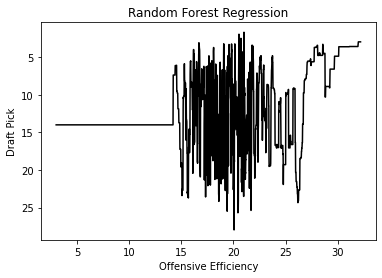

Accuracy of The Random Forest Regression Model for offensive efficiency is:  0.35578863866782245


In [ ]:
#Random Forest Regressor Modeli.

#Offensive Efficiency: 
df_regressor_off = df_ML.copy()
df_regressor_off.drop("Player", axis = 1, inplace = True)
df_regressor_off.drop("st_eff", axis = 1, inplace = True)

draft_regressor_off = df_regressor_off["draft_pick"]
offensive_regressor = df_regressor_off["off_eff"]

regressor_train, regressor_test, regressor_draft_train, regressor_draft_test = train_test_split(offensive_regressor, draft_regressor_off, test_size = 0.2)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 10 )
regressor.fit(regressor_train.values.reshape(-1,1), regressor_draft_train.values.ravel())

Prediction = regressor.predict(regressor_test.values.reshape(-1,1))

#df_regressor_off = pd.DataFrame({'Real Values':regressor_draft_test.ravel(), 'Predicted Values':Prediction.ravel()}) Gerçek ve tahmin edilen değerleri dataframe haline getiriyor.



X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(regressor_test, regressor_draft_test, color = 'red')
plt.scatter(regressor_test, Prediction, color = 'green')

print("For Offensive Efficiency: ")
plt.title('Random Forest Regression')
plt.xlabel('Offensive Efficiency')
plt.ylabel('Draft Pick')
plt.gca().invert_yaxis()
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Offensive Efficiency')
plt.ylabel('Draft Pick')
plt.gca().invert_yaxis()
plt.show()

accuracy_regression_off = regressor.score(regressor_test.values.reshape(-1,1), regressor_draft_test.values.reshape(-1,1)) * -1
print("Accuracy of The Random Forest Regression Model for offensive efficiency is: ", accuracy_regression_off)

The Random Forest Regression Model is much more beneficial for the project as seen in the graph, ***the predicted values(green)*** and ***the actual values(red)*** are so close to each other except the extreme points of the graph where the values are closer to the edges. The accuracy of the machine learning model for offensive efficiency is a much more better result compared to the previous machine learning models.

For Standard Efficiency: 


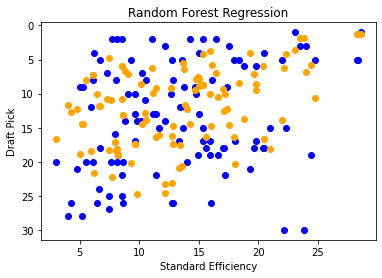

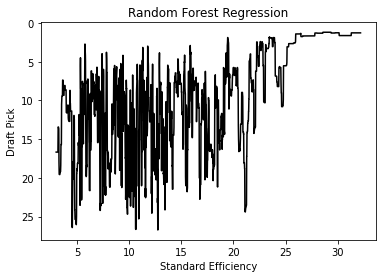

Accuracy of The Random Forest Regression Model for Standard Efficiency is:  0.5568835985715599


In [ ]:
#Random Forest Regressor Modeli.

#Standard Efficiency:
df_regressor_stf = df_ML.copy()
df_regressor_stf.drop("Player", axis = 1, inplace = True)
df_regressor_stf.drop("off_eff", axis = 1, inplace = True)

draft_regressor_stf = df_regressor_stf["draft_pick"]
standard_regressor = df_regressor_stf["st_eff"]

standard_train, standard_test, draft_train, draft_test = train_test_split(standard_regressor, draft_regressor_stf, test_size = 0.2)

regressor_st = RandomForestRegressor(n_estimators = 100, random_state = 10 )
regressor_st.fit(standard_train.values.reshape(-1,1), draft_train.values.ravel())

standard_prediction = regressor_st.predict(standard_test.values.reshape(-1,1))

X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(standard_test, draft_test, color = 'blue')
plt.scatter(standard_test, standard_prediction, color = 'orange')

print("For Standard Efficiency: ")
plt.title('Random Forest Regression')
plt.xlabel('Standard Efficiency')
plt.ylabel('Draft Pick')
plt.gca().invert_yaxis()
plt.show()

plt.plot(X_grid, regressor_st.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Standard Efficiency')
plt.ylabel('Draft Pick')
plt.gca().invert_yaxis()
plt.show()

accuracy_regression_st = regressor_st.score(standard_test.values.reshape(-1,1), draft_test.values.reshape(-1,1)) * -1
print("Accuracy of The Random Forest Regression Model for Standard Efficiency is: ", accuracy_regression_st)

As proved in the above graph the Random Forest Regression Model is much more succesful compared to the other machine learning models. The accuracy of the model shows how the machine learning model is the best option so far and also it proves Standard Efficiency is a much more important feature for the Draft Picks. In the graph ***predicted values(orange)*** and ***the real values(blue)*** are much more closer to the any other method we have previously used and ***it proves that the Standard Efficiency is the feature which can be used to predict a player's draft pick number.*** 

### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

We used offensive efficiency and standart efficiency traits as variables to create our problem and find a solution to it because of that those two traits are the most efficient features to see a players performance during season. Standart efficiency gives us a general information about a players performance in the season and offensive efficiency is giving us generally about the offensive features of a player, we compared those two traits because if a players offensive features are more effective this can make him more visible but it does not give us a general information about the player, so we decided to see if the general quality is more effective to be choosen to draft or a players all features are important to be picked to draft. These features are effective in predicting the draft pick of a player because they provide us general information about the performance of a player throughout the season. In order to observe the data clearly and see the correlation between features noticeably we used the linear regression method which gave us the coefficients for the correlation between draft pick and standard/offensive efficiencies. After we apply linear regression, this let us to see the correlation between different traits firstly the standart efficiency scatter plot shows us that standart efficiency has a stronger correlation compared with the draft picks compared to the offensive efficiency, and linear regression model is successful to indicate the relation between these variables. 
We used Random Forest Classification, because we wanted to observe the relations between each 10 pick. In this case we created 3 classes. However, the accuracies (both offensive and standard) of the model is low. It is because, we observed that some draft picks which are too close, but the efficiency value of the lower pick (draft pick is higher) is more than the efficiency value of the higher pick (draft pick is lower). Since the classes of these are different and the number of this cases is not few the hierarchy would not be satisfied. Hence, accuracy values in the Random Forest Classification are turned out be low.
Random Forest Regression proved to be the most succesful machine learning method in terms of both giving a better accuracy and by also visualising how predicted values are close to the real values. By using the Random Forest Regression method for both offensive and standard efficiency, we prove that standard efficiency is a much more important feature for the draft picks. As the result, we acknowledge that the Random Forest Regression machine learning model was the most fitting method, as it provided much better accuracy and overall visualization for the problem.

## Conclusion

<font color="blue">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>

We first had a dataset of basketball players of all leauges and seasons. We wanted to discuss whether the draft picks of only NBA players were made with the expactation of players with generally standard efficiency or highly offensive efficiency. By utilizing the data and visualizing many graphs we made clear the distinction between features. After data utilization and linear regression, we witnessed a higher level of correlation between standard efficiency and draft picks compared to the offensive efficiency and draft picks. Our solution gave us more detailed research for our problem but it does not give us a strong correlation in order to evaluate the relationship between offensive/standart efficiency traits and drafts of the players. 

Advantages of using Random Forest Classification is that it allowed us to see the relationship between each instances, for each class more accurately. Disadvantage of it is that first we can't see the relation of whole instances generally, because we divided the instances into classes.

Advantages of using random forest regression is that it enables us to clearly see the correlation between the efficiencies(offensive and standart) and the draft pick so it can be said that random forest regression model is the advanced machine learning model for our project. Disadvantage of using this machine learning model is that while calculating accuracy it overlooks the extreme points which are located secludedly in the graph.

As an answer to our project question, our various models and the graphs we concluded that standart efficiency is a much more important feature to pick a player to draft compared to offensive efficiency.




## Future Work

<font color="blue">
In the progress report, clearly state your goals for the final report.<br>
In the final report, articulate on the future directions, scenarios.
</font>

We learned a lot by using these machine learning models but instead of choosing overall efficiencies choosing the all the attributes seperatly to have more accurate results on the way solving our problem question.



## Work Division

<font color="blue">

A clear description of the division of work among teammates.
</font>

Berke, Deniz, Ercan and Berkay first discussed how to make progress in the project and how can we utilize the dataset to give an answer to our question/problem. After that Ercan and Berke utilized the dataset in the implementation part and made it usable for the rest of the project and Berkay displayed the graphs of the utilized data. Berke, Ercan and Berkay all worked together on data exploration in order to solve the problem we extracted the features from both data sets and connected them for exploration of data and created a new data frame and displayed the graphs for this new data frame and the relationships of features with each other. Firstly Deniz, Berkay, Ercan and Berke discussed about which machine learning model is more useful and beneficial for the project. After that, Berke and Ercan utilized the dataframe in order to use it in the Linear Regression model. Berkay implemented the linear regression and displayed the graphs for the visualization part and also Deniz helped with the graphs. We all worked together on the machine learning models which are random forest classification and random forest regression. Ercan and Berkay visiualized the graphs and Ercan, Berkay, Berke, Deniz evaluated the results.

*** We also thank Rana KALKAN for helping us throughout our project.***